# EDA primer dataset 
---

En este notebook, vamos a explorar el dataset que hemos obtenido, con el objetivo de detectar relaciones y patrones en los datos, así como detectar outliers para preprocesar correctamente los datos de cara a su posterior modelado. 


## Configuración del entorno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
import numpy as np
import os

#  Rutas base
PATH_SOURCE_LABELS = "/home/carlos/Documentos/TFG/spark-workspace/data/datasets/etiquetas"
PATH_SOURCE_DATA = "/home/carlos/Documentos/TFG/spark-workspace/data/datasets/datos"
PATH_SOURCE_DATASETS = "/home/carlos/Documentos/TFG/spark-workspace/data/datasets"


## Carga de datos


In [3]:
# Cargar el DataFrame con las features por usuario
ruta_features = os.path.join(PATH_SOURCE_DATA, "actividades_ventana_observacion.parquet")
df_features = pd.read_parquet(ruta_features)

# Cargar el DataFrame con las etiquetas desde el directorio generado por Spark
ruta_etiquetas = os.path.join(PATH_SOURCE_LABELS, "etiquetas_abandono_entregas.parquet")
df_etiquetas = pd.read_parquet(ruta_etiquetas)

# Unir ambos por 'userid'
df_completo = df_features.merge(df_etiquetas, on='userid', how='inner')

df_completo.to_csv(f"{PATH_SOURCE_DATASETS}/dataset_1.0.csv")

# Mostrar muestra de los datos fusionados
display(df_completo.head())

num_columnas = len(df_completo.columns)
print(f"Número de columnas : {num_columnas}")

# Ordenar las columnas según el criterio especificado
#----------------------------------------------------------------------------
cuestionarios = ['Perfil', 'Test Expr.', 'Test Complejidad']
actividades = [col for col in df_completo.columns if 'Act.' in col and '(nota)' not in col]
clases = [col for col in df_completo.columns if 'Clase' in col and '(nota)' not in col]

# Ordenar cada grupo por el número en el nombre
cuestionarios.sort(key=lambda x: int(x.split()[-1]) if x.split()[-1].isdigit() else 0)
actividades.sort(key=lambda x: int(x.split()[1]) if x.split()[1].isdigit() else 0)
clases.sort(key=lambda x: int(x.split()[1]) if x.split()[1].isdigit() else 0)

# Generar las parejas actividad-nota
cuestionarios_parejas = [item for q in cuestionarios for item in (q, f"{q} (nota)")]
actividades_parejas = [item for a in actividades for item in (a, f"{a} (nota)")]
clases_parejas = [item for c in clases for item in (c, f"{c} (nota)")]

# Crear el nuevo orden de columnas
nuevo_orden = ['userid'] + cuestionarios_parejas + actividades_parejas + clases_parejas + ['abandona']

# Reordenar las columnas del DataFrame
df_completo = df_completo[nuevo_orden]
print("\nColumnas reordenadas por orden cronologico y tipo de actividad:\n")

display(df_completo.head())





,userid,Act. 07,Act. 07 (nota),Perfil,Perfil (nota),Test Expr.,Test Expr. (nota),Test Complejidad,Test Complejidad (nota),Clase 1,...,Clase 3 (nota),Act. 02 - Elecciones,Act. 02 - Elecciones (nota),Act. 03 - Catalan,Act. 03 - Catalan (nota),Act. 04 - Primos,Act. 04 - Primos (nota),Act. 05 - Vectores,Act. 05 - Vectores (nota),abandona
0,e1f1d0f48ca77093f9d66cefd325504245277db3e6c145...,1,8.50,1,2.0,1,10.0,1,5.00000,1,...,7.5,1,10.0,1,7.0,1,10.0,0,NaN,0
1,b5de2bb5b8538b199d6b3f0ecb32daa8a9d730ccc484db...,1,6.25,1,2.0,1,10.0,1,6.00000,1,...,10.0,1,10.0,1,10.0,1,10.0,1,10.0,0
2,90a634296aff946e9d045997d512d2b77dbc01880715c1...,1,6.00,1,2.0,1,10.0,1,8.66667,1,...,NaN,1,10.0,1,10.0,1,9.0,1,5.0,1
3,b6b2a12e84ea8203775195ed2bb4e99c5788053782b0bd...,1,10.00,1,2.0,1,10.0,1,7.33333,1,...,10.0,1,10.0,1,10.0,1,10.0,1,10.0,0
4,fd96e32a94a932f45eb32933d9ffeb71f4addf9153a76b...,1,0.00,1,2.0,1,6.0,1,6.00000,1,...,NaN,1,10.0,1,10.0,0,NaN,1,10.0,0


Número de columnas : 38

Columnas reordenadas por orden cronologico y tipo de actividad:



,userid,Perfil,Perfil (nota),Test Expr.,Test Expr. (nota),Test Complejidad,Test Complejidad (nota),Act. 02 - Elecciones,Act. 02 - Elecciones (nota),Act. 03 - Catalan,...,Clase 10 (nota),Clase 13,Clase 13 (nota),Clase 18,Clase 18 (nota),Clase 22,Clase 22 (nota),Clase 23,Clase 23 (nota),abandona
0,e1f1d0f48ca77093f9d66cefd325504245277db3e6c145...,1,2.0,1,10.0,1,5.00000,1,10.0,1,...,7.5,1,10.0,1,10.0,1,10.0,0,NaN,0
1,b5de2bb5b8538b199d6b3f0ecb32daa8a9d730ccc484db...,1,2.0,1,10.0,1,6.00000,1,10.0,1,...,10.0,1,10.0,1,7.5,1,10.0,1,10.0,0
2,90a634296aff946e9d045997d512d2b77dbc01880715c1...,1,2.0,1,10.0,1,8.66667,1,10.0,1,...,7.5,0,NaN,0,NaN,0,NaN,0,NaN,1
3,b6b2a12e84ea8203775195ed2bb4e99c5788053782b0bd...,1,2.0,1,10.0,1,7.33333,1,10.0,1,...,10.0,1,8.0,1,10.0,1,10.0,1,10.0,0
4,fd96e32a94a932f45eb32933d9ffeb71f4addf9153a76b...,1,2.0,1,6.0,1,6.00000,1,10.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


## Chequeo básico y distribución de la etiqueta

En este bloque se realiza una primera exploración del dataset completo tras fusionar las features y las etiquetas. Se analizan:

- El número de muestras y columnas.
- Los tipos de datos de cada columna.
- La cantidad de valores nulos por columna.
- La distribución de la variable objetivo (`abandona_por_entregas`), tanto en valores absolutos como en porcentaje.
- Una gráfica de barras que muestra visualmente el desbalance de clases.

Este paso es esencial para tener una primera impresión de la calidad de los datos y del grado de desbalanceo de la variable que queremos predecir.


Número de muestras: 201
Número de columnas: 38

Tipos de datos:


userid                          object
Perfil                           int32
Perfil (nota)                  float64
Test Expr.                       int32
Test Expr. (nota)              float64
Test Complejidad                 int32
Test Complejidad (nota)        float64
Act. 02 - Elecciones             int32
Act. 02 - Elecciones (nota)    float64
Act. 03 - Catalan                int32
Act. 03 - Catalan (nota)       float64
Act. 04 - Primos                 int32
Act. 04 - Primos (nota)        float64
Act. 05 - Vectores               int32
Act. 05 - Vectores (nota)      float64
Act. 07                          int32
Act. 07 (nota)                 float64
Clase 1                          int32
Clase 1 (nota)                 float64
Clase 2                          int32
Clase 2 (nota)                 float64
Clase 3                          int32
Clase 3 (nota)                 float64
Clase 5                          int32
Clase 5 (nota)                 float64
Clase 6                  


Valores nulos por columna:


Clase 23 (nota)                108
Clase 22 (nota)                 96
Clase 18 (nota)                 84
Clase 13 (nota)                 83
Clase 10 (nota)                 79
Clase 6 (nota)                  61
Clase 5 (nota)                  54
Act. 05 - Vectores (nota)       44
Clase 3 (nota)                  42
Clase 2 (nota)                  42
Clase 1 (nota)                  40
Act. 04 - Primos (nota)         37
Act. 03 - Catalan (nota)        36
Act. 02 - Elecciones (nota)     33
Test Complejidad (nota)         29
Test Expr. (nota)               25
Perfil (nota)                    2
Perfil                           0
Test Complejidad                 0
Test Expr.                       0
userid                           0
Act. 03 - Catalan                0
Clase 3                          0
Clase 2                          0
Act. 07 (nota)                   0
Clase 1                          0
Act. 07                          0
Act. 02 - Elecciones             0
Act. 04 - Primos    


Distribución de la clase 'abandona':


abandona
0    168
1     33
Name: count, dtype: int64

abandona
0    83.58%
1    16.42%
Name: proportion, dtype: object

/tmp/ipykernel_32350/888552015.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_completo, x='abandona', palette='Set2')


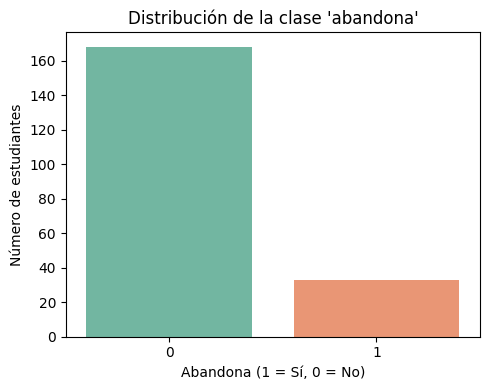

In [4]:
# Tamaño del dataset
print(f"Número de muestras: {df_completo.shape[0]}")
print(f"Número de columnas: {df_completo.shape[1]}")

# Tipos de datos
print("\nTipos de datos:")
display(df_completo.dtypes)

# Comprobar valores nulos por columna
print("\nValores nulos por columna:")
display(df_completo.isnull().sum().sort_values(ascending=False))

# Distribución de la etiqueta (abandona)
print("\nDistribución de la clase 'abandona':")
display(df_completo['abandona'].value_counts())
display(df_completo['abandona'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

# Visualización de la distribución de clases
plt.figure(figsize=(5, 4))
sns.countplot(data=df_completo, x='abandona', palette='Set2')
plt.title("Distribución de la clase 'abandona'")
plt.xlabel("Abandona (1 = Sí, 0 = No)")
plt.ylabel("Número de estudiantes")
plt.tight_layout()
plt.show()


# Gráficos de caja 
---

## Análisis de distribución de notas por clase de abandono

En este bloque se analizan las distribuciones de las calificaciones de cada actividad, diferenciando entre alumnos que abandonan y los que no. 

El objetivo es identificar si existen diferencias en el rendimiento académico entre ambos grupos, así como detectar posibles valores atípicos. Se utiliza `boxplot` para visualizar estas diferencias y la dispersión de las notas.



### Pre-limpieza 

Para capturar el impacto de la no entrega, se imputó NaN/-1 → 0 en las columnas (nota), de modo que el valor cero represente  la ausencia de participación.”

In [5]:
# Copia de trabajo para no tocar el original
df_notas = df_completo.copy()

# Localizar columnas de nota
cols_nota = [c for c in df_notas.columns if '(nota)' in c]

# Sustituir NaN y -1 por 0  (0 = no entregada o cero real)
df_notas[cols_nota] = (
    df_notas[cols_nota]
    .fillna(0)               # NaN → 0
    .replace(-1, 0)          # -1  → 0
    .astype(float)           # por si hubiera ints
)



### Visualización

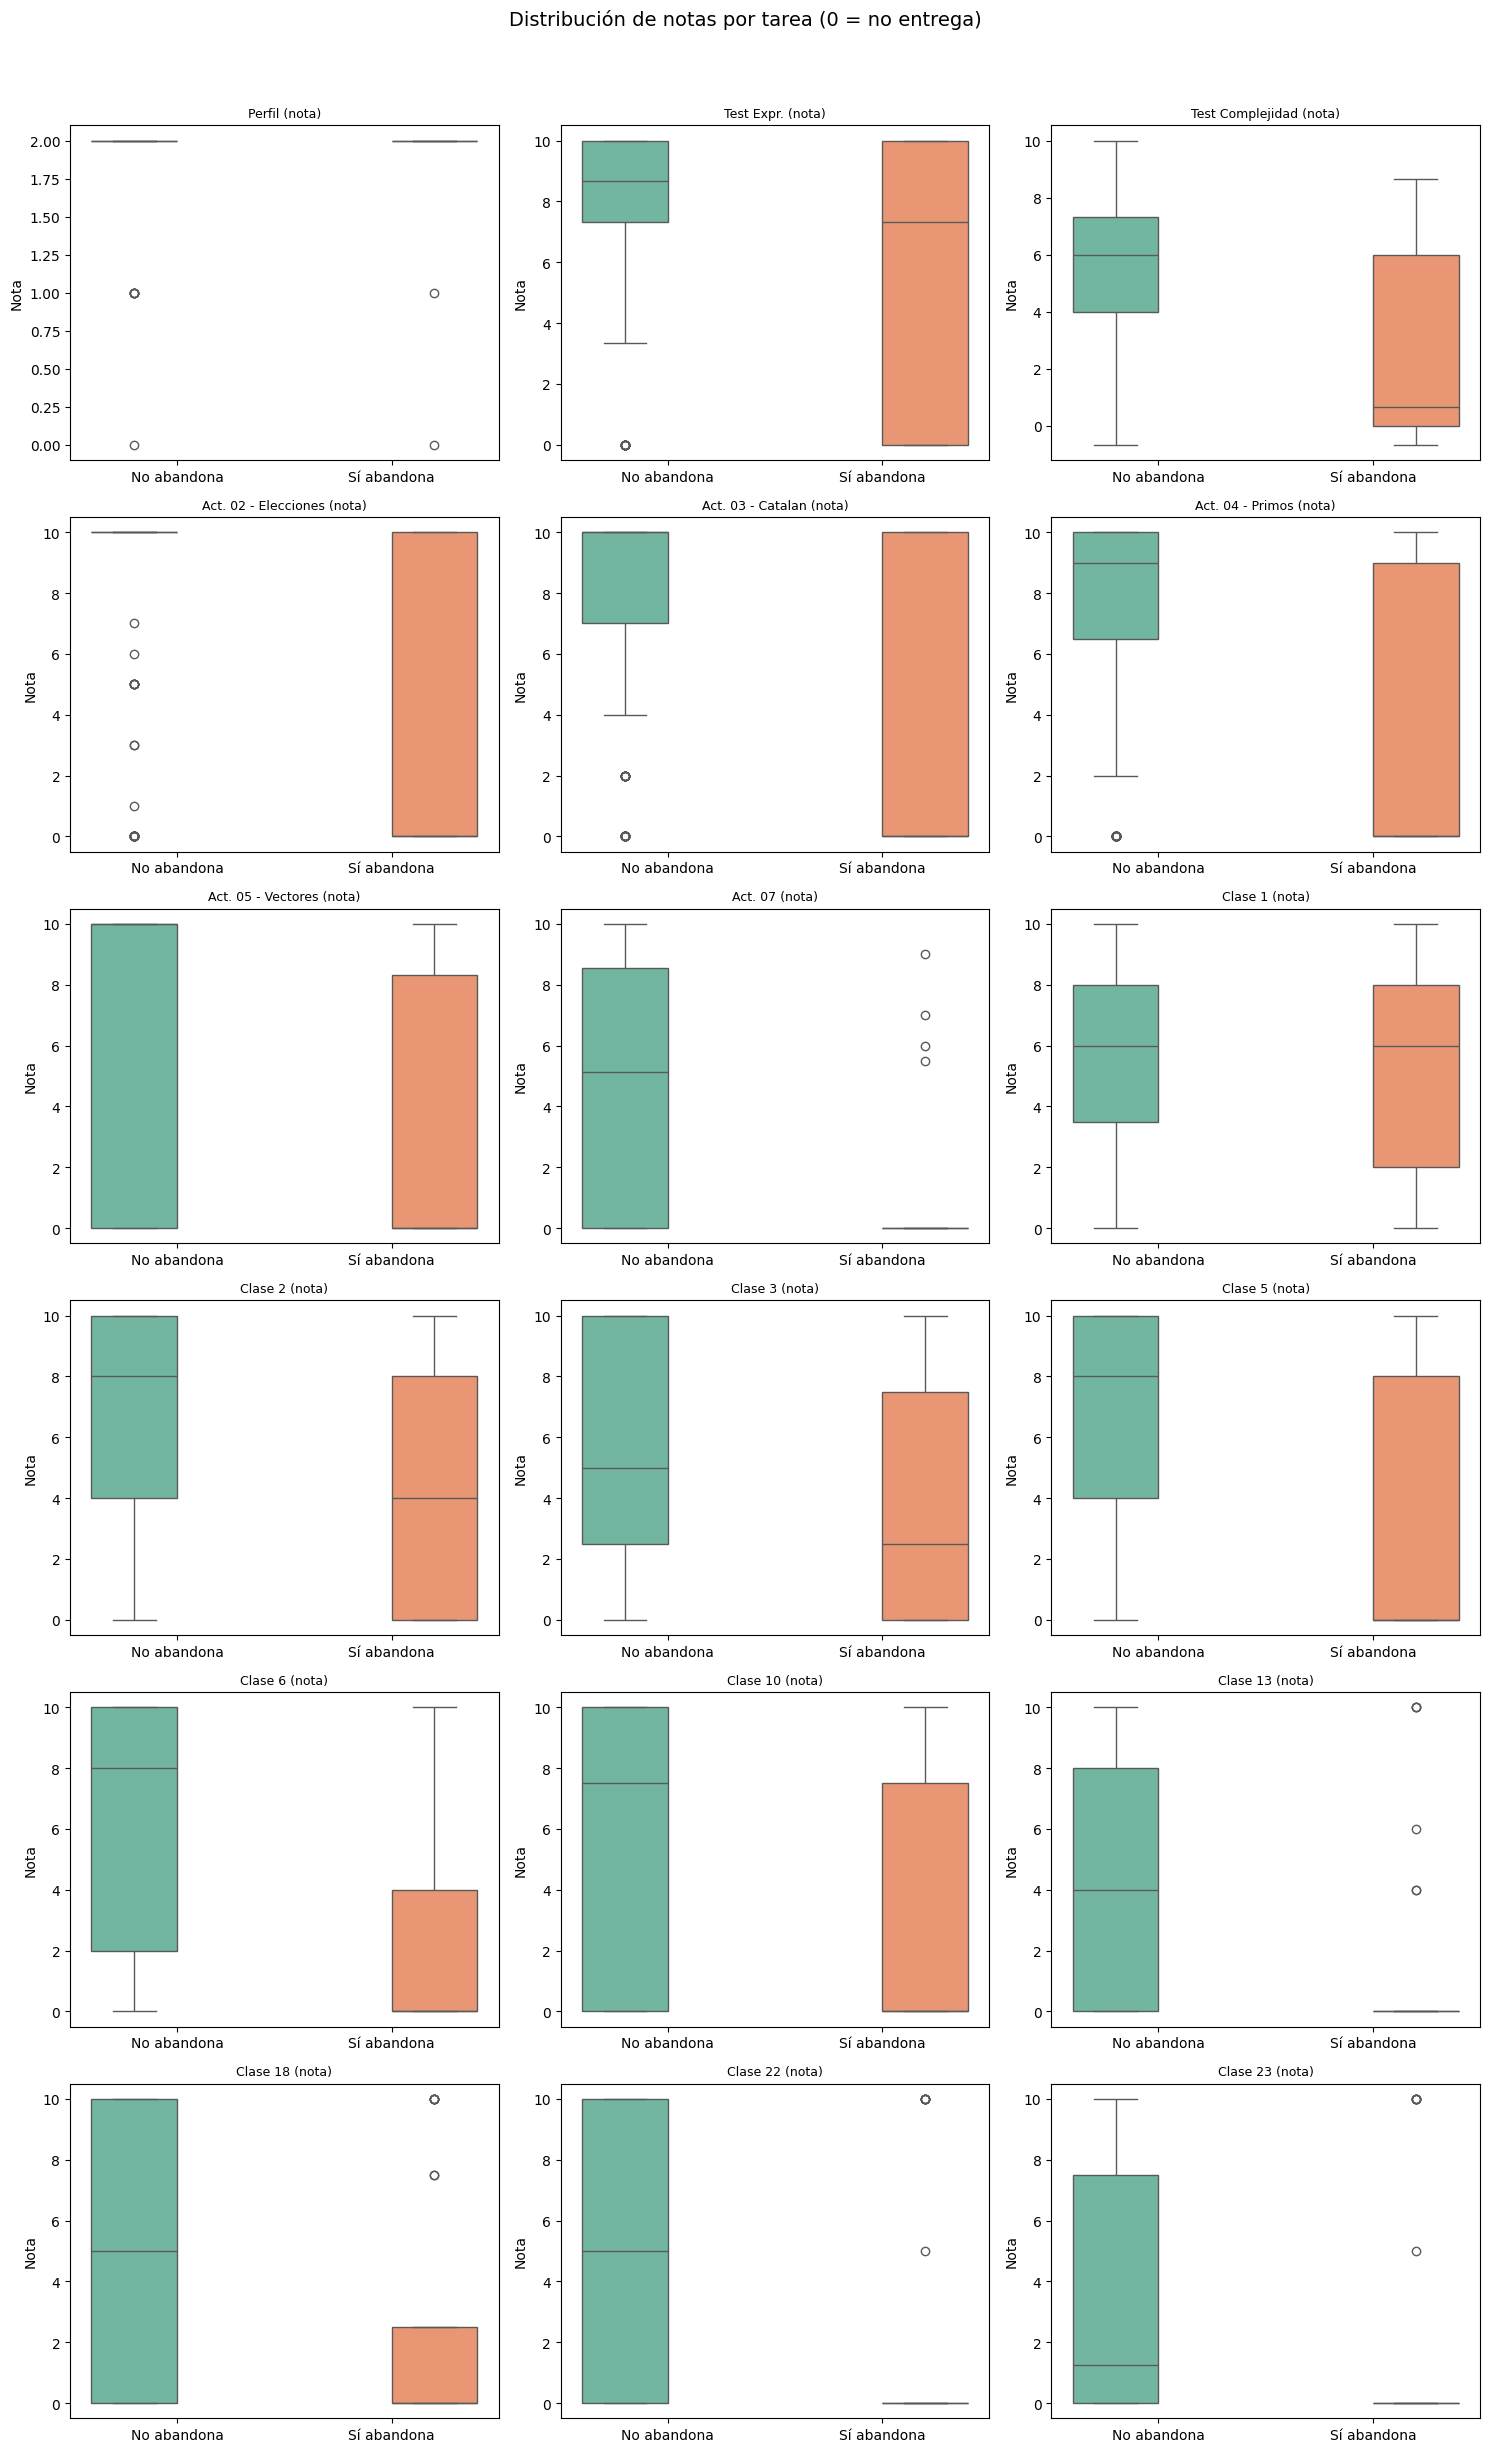

In [7]:
# -----------  A. Box-plots de NOTAS  -----------
cols_nota = [c for c in df_notas.columns if '(nota)' in c]  # df_notas: NaN/-1 → 0

n_cols, n_rows = 3, int(np.ceil(len(cols_nota) / 3))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

for ax, col in zip(axes.flatten(), cols_nota):
    sns.boxplot(
        data=df_notas,
        x='abandona',          
        y=col,
        hue='abandona',
        dodge=True,
        palette='Set2',
        legend=False,
        ax=ax
    )
    ax.set_title(col, fontsize=9)
    ax.set_xlabel("")
    ax.set_ylabel("Nota")

    # Fijar ticks y etiquetas sin warning
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No abandona", "Sí abandona"])

# leyenda global
handles, _ = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['No abandona', 'Sí abandona'],
           loc='upper center', ncol=2, frameon=False)

plt.suptitle("Distribución de notas por tarea (0 = no entrega)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


### Insights

**Tareas más (y menos) informativas respecto al abandono**

| Categoría | Evidencia en el box-plot | Interpretación |
|-----------|--------------------------|----------------|
| **Muy discriminantes** | `Act. 03 – Catalan`, `Clase 13`,`Clase 18`, `Clase 22`, `Actividad 07` muestran distancias claras entre medianas y/o la caja de abandono se desploma a 0. | Los alumnos que abandonan raramente superan 2-3 puntos o directamente no entregan. |
| **Moderadamente útiles** | `Test Complejidad`, `Clase 5`, `Clase 1` mantienen cierta separación aunque con mayor solapamiento. | Buenas para modelos no lineales, podrían descartarse en lineales si hay multicolinealidad. |
| **Baja relevancia** | `Perfil (nota)` y `Test Expr.`: ambas clases concentran el mismo valor (2 ↔ 0) y apenas varían. | Poca capacidad predictiva; se pueden eliminar sin gran pérdida. |

> **Nota sobre cajas sin mediana**  
> Si la línea de la mediana no se ve o la “caja” desaparece, significa que la mayoría de valores son idénticos (p.ej. todos 0) y el IQR se colapsa. Lejos de ser un problema, esto refuerza la idea de que esa tarea distingue bien a los grupos.


Además, podemos apreciar cómo , a medida que avanza el cuatrimestre, hay mas distnacia entre la mediana y el rango de valores que toman las notas de los cuestionarios previos a clase entre la clase que abandona y la que no, dado que a partir del cuestionario previo a la clase 5, cada vez se concentran más los valores de la clase que abandono en la nota 0, indicativa de una calificación nula o de que no se entregó el cuestionario.

Sucede igual con la actividad 07, la última actividad previa al proyecto, que se puede apreciar como es mucho mas indicativa del abandono y la mediana de las dos clases está muy distanciada tambien, y en el caso del abandono se comprime en el valor 0. 

## Análisis de entregas por clase de abandono

En este bloque se analiza la relación entre la cantidad de actividades entregadas y el abandono. 

Se genera una nueva variable `num_entregas` que contabiliza cuántas actividades ha entregado cada estudiante. Luego se analiza si los estudiantes que abandonan tienden a entregar menos actividades, lo que puede ser una señal temprana de desconexión.



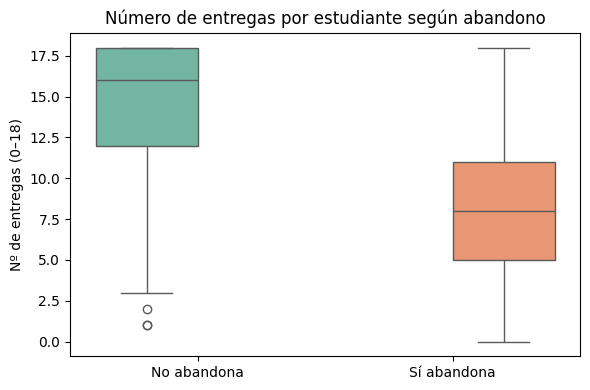

In [8]:
# Seleccionar columnas de entregas (no son notas ni identificadores)
cols_entregas = [col for col in df_completo.columns 
                 if '(nota)' not in col and col not in ['userid', 'abandona']]

# Calcular número de entregas por estudiante
df_completo['num_entregas'] = df_completo[cols_entregas].sum(axis=1)

# Visualizar distribución de entregas por clase
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_completo,
    x='abandona',             # ← necesario para etiquetas
    y='num_entregas',
    hue='abandona',
    palette='Set2',
    legend=False,
    dodge=True
)
plt.title("Número de entregas por estudiante según abandono")
plt.xlabel("")
plt.ylabel("Nº de entregas (0–18)")
plt.xticks(ticks=[0, 1], labels=["No abandona", "Sí abandona"])  # ← etiquetas personalizadas
plt.tight_layout()
plt.show()


# Insights globales 
---

**Insights generales obtenidos tras el EDA**

- Existe un **fuerte desbalance** de participación: los estudiantes que no abandonan presentan una mediana de **16 entregas** frente a **8** en los que sí abandonan.
- Al imputar `NaN`/-1 → 0, el valor **0 simboliza “no entregó”**; así la falta de actividad queda reflejada en las distribuciones.
- En la mayoría de tareas, los alumnos que abandonan concentran notas **bajas o nulas** y muestran mayor dispersión (colas largas), mientras que los que permanecen obtienen notas medianas-altas y más consistentes.
- Estos hallazgos guían el preprocesado:
  1. Conservar `num_entregas` y las 18 banderas 0/1 de entrega.  
  2. Escalar solo las variables numéricas (`num_entregas` + notas) para los modelos sensibles a escala.  
  3. Aplicar `class_weight='balanced'` y evaluar SMOTE por el desbalance 84 % / 16 %.


## Exportar dataset con la nueva metrica num_entregas

In [11]:
# Reordenar las columnas para que 'num_entregas' sea la penúltima
cols = list(df_completo.columns)
cols.remove('num_entregas')
cols.insert(-1, 'num_entregas')
df_completo = df_completo[cols]

# df_completo = df_completo.drop(columns=["Perfil (nota)", "Perfil"])

# Mostrar el DataFrame completo sin truncar las columnas
pd.set_option('display.max_columns', None)
display(df_completo)

display(df_completo.dtypes)

# Guardar el DataFrame en formato parquet
output_path = os.path.join(PATH_SOURCE_DATASETS, "dataset_2.0.parquet")
df_completo.to_parquet(output_path, index=False)



,userid,Test Expr.,Test Expr. (nota),Test Complejidad,Test Complejidad (nota),Act. 02 - Elecciones,Act. 02 - Elecciones (nota),Act. 03 - Catalan,Act. 03 - Catalan (nota),Act. 04 - Primos,Act. 04 - Primos (nota),Act. 05 - Vectores,Act. 05 - Vectores (nota),Act. 07,Act. 07 (nota),Clase 1,Clase 1 (nota),Clase 2,Clase 2 (nota),Clase 3,Clase 3 (nota),Clase 5,Clase 5 (nota),Clase 6,Clase 6 (nota),Clase 10,Clase 10 (nota),Clase 13,Clase 13 (nota),Clase 18,Clase 18 (nota),Clase 22,Clase 22 (nota),Clase 23,Clase 23 (nota),num_entregas,abandona
0,e1f1d0f48ca77093f9d66cefd325504245277db3e6c145...,1,10.00000,1,5.00000,1,10.0,1,7.0,1,10.0,0,NaN,1,8.50,1,8.0,1,8.0,1,7.5,0,NaN,1,10.0,1,7.5,1,10.0,1,10.0,1,10.0,0,NaN,15,0
1,b5de2bb5b8538b199d6b3f0ecb32daa8a9d730ccc484db...,1,10.00000,1,6.00000,1,10.0,1,10.0,1,10.0,1,10.00,1,6.25,1,10.0,1,8.0,1,10.0,1,8.0,1,6.0,1,10.0,1,10.0,1,7.5,1,10.0,1,10.0,18,0
2,90a634296aff946e9d045997d512d2b77dbc01880715c1...,1,10.00000,1,8.66667,1,10.0,1,10.0,1,9.0,1,5.00,1,6.00,1,6.0,0,NaN,0,NaN,0,NaN,0,NaN,1,7.5,0,NaN,0,NaN,0,NaN,0,NaN,10,1
3,b6b2a12e84ea8203775195ed2bb4e99c5788053782b0bd...,1,10.00000,1,7.33333,1,10.0,1,10.0,1,10.0,1,10.00,1,10.00,1,10.0,1,10.0,1,10.0,1,10.0,1,10.0,1,10.0,1,8.0,1,10.0,1,10.0,1,10.0,18,0
4,fd96e32a94a932f45eb32933d9ffeb71f4addf9153a76b...,1,6.00000,1,6.00000,1,10.0,1,10.0,0,NaN,1,10.00,1,0.00,1,0.0,1,8.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,a84ab1865c59659dc6eff2c5d7bd99be7d1702207963b0...,1,8.66667,1,4.66667,1,10.0,1,10.0,1,10.0,1,10.00,1,3.75,0,NaN,1,6.0,1,2.5,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,10,0
197,d46525fcffba400caa4fc21005b92fa32ed6922cf520d4...,1,10.00000,0,NaN,1,0.0,0,NaN,0,NaN,0,NaN,0,-1.00,0,NaN,1,10.0,1,10.0,1,10.0,1,6.0,1,10.0,1,10.0,0,NaN,0,NaN,0,NaN,9,0
198,571a6aae9b56541a475c2693de2e90c573534058a1063a...,0,NaN,1,6.00000,1,10.0,1,10.0,1,10.0,1,0.00,1,3.00,0,NaN,0,NaN,0,NaN,1,6.0,0,NaN,1,5.0,1,4.0,1,0.0,1,7.5,1,10.0,13,0
199,8bebcc80d3ad7e6037990a53263910dcbab9eca028145d...,1,8.66667,1,4.66667,1,5.0,1,7.0,1,10.0,1,8.33,1,4.00,1,10.0,1,8.0,1,7.5,1,10.0,1,8.0,1,10.0,1,10.0,1,10.0,1,10.0,1,2.5,18,0


userid                          object
Test Expr.                       int32
Test Expr. (nota)              float64
Test Complejidad                 int32
Test Complejidad (nota)        float64
Act. 02 - Elecciones             int32
Act. 02 - Elecciones (nota)    float64
Act. 03 - Catalan                int32
Act. 03 - Catalan (nota)       float64
Act. 04 - Primos                 int32
Act. 04 - Primos (nota)        float64
Act. 05 - Vectores               int32
Act. 05 - Vectores (nota)      float64
Act. 07                          int32
Act. 07 (nota)                 float64
Clase 1                          int32
Clase 1 (nota)                 float64
Clase 2                          int32
Clase 2 (nota)                 float64
Clase 3                          int32
Clase 3 (nota)                 float64
Clase 5                          int32
Clase 5 (nota)                 float64
Clase 6                          int32
Clase 6 (nota)                 float64
Clase 10                 